In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV




# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

loc = './MELBOURNE_HOUSE_PRICES_LESS.csv'
data = pd.read_csv(loc)

In [2]:
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
data.shape


(63023, 13)

In [4]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [5]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [6]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

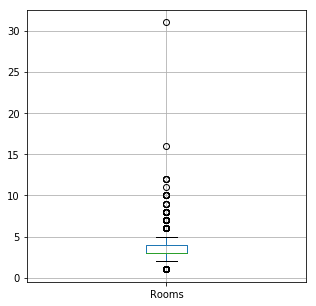

In [7]:
data.boxplot( column = 'Rooms',  figsize=(5, 5))    

In [8]:
data[data.Rooms ==  31 ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
55467,Wantirna South,5 Cottswold Pl,31,h,990000.0,S,Justin,27/06/2016,3152,Eastern Metropolitan,7082,14.7,Knox City Council


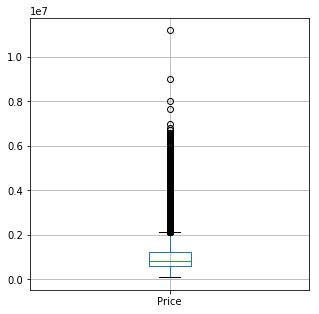

In [9]:
data.boxplot( column = 'Price',  figsize=(5, 5))                                         

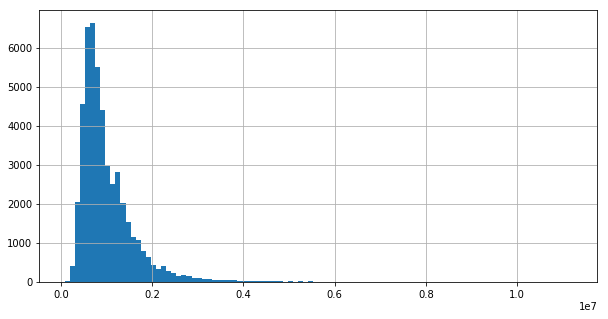

In [10]:
data.Price.hist(bins = 100 ,  figsize=(10, 5))

C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


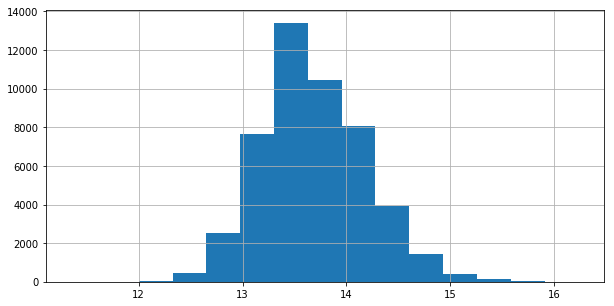

In [11]:
np.log(data.Price).hist(bins=15, figsize=(10, 5));

In [12]:
##may need to take the log of price

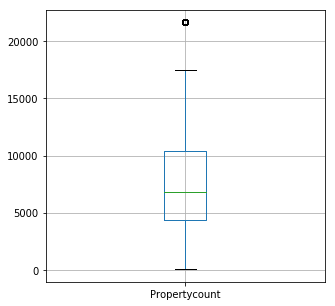

In [13]:
data.boxplot( column = 'Propertycount',  figsize=(5, 5))    

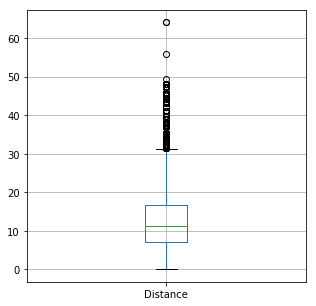

In [14]:
data.boxplot( column = 'Distance',  figsize=(5, 5))    

In [15]:
#convert date to datetime

In [16]:
data['Date'] = pd.to_datetime(data.Date)

In [17]:
data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Postcode                  int64
Regionname               object
Propertycount             int64
Distance                float64
CouncilArea              object
dtype: object

In [18]:
data.Method.value_counts()

S     34063
PI     9790
SP     8916
VB     5956
SN     2674
PN      651
W       484
SA      416
SS       73
Name: Method, dtype: int64

In [19]:
data.Suburb.value_counts()

Reservoir            1241
Bentleigh East        845
Mount Waverley        831
Richmond              822
Glen Waverley         819
Craigieburn           783
Preston               699
Kew                   668
Glen Iris             662
Brunswick             644
Northcote             613
South Yarra           603
Brighton              602
Hawthorn              601
Balwyn North          595
Coburg                592
Camberwell            573
Glenroy               570
Cheltenham            569
Essendon              568
Brighton East         559
Bundoora              558
Mill Park             554
Pascoe Vale           529
Epping                511
St Kilda              507
Port Melbourne        506
Malvern East          505
Doncaster East        492
Hoppers Crossing      489
                     ... 
Park Orchards           2
Ferny Creek             2
Olinda                  2
Chintin                 2
Cockatoo                2
Warburton               2
Woori Yallock           2
Warneet     

In [20]:
data.Regionname.value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

In [21]:
data.CouncilArea.value_counts()

Boroondara City Council           5132
Darebin City Council              4182
Banyule City Council              3656
Monash City Council               3592
Bayside City Council              3331
Brimbank City Council             3296
Moreland City Council             3030
Hume City Council                 2939
Glen Eira City Council            2934
Melbourne City Council            2728
Whittlesea City Council           2545
Moonee Valley City Council        2512
Kingston City Council             2378
Manningham City Council           2225
Maribyrnong City Council          2083
Stonnington City Council          1991
Whitehorse City Council           1811
Port Phillip City Council         1771
Yarra City Council                1698
Wyndham City Council              1542
Maroondah City Council            1451
Hobsons Bay City Council          1351
Knox City Council                 1043
Greater Dandenong City Council     948
Frankston City Council             835
Melton City Council      

In [22]:
data.Type.value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

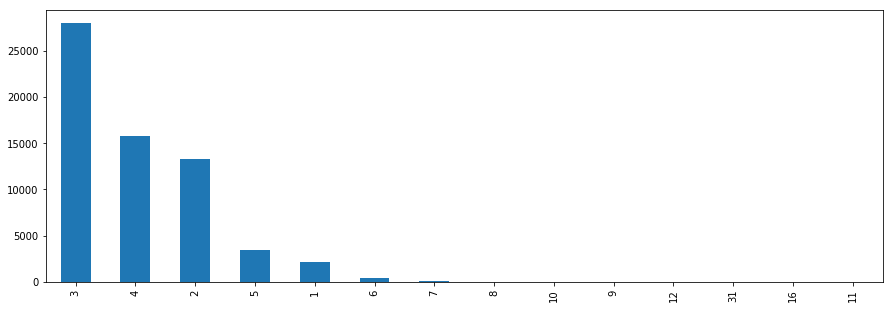

In [23]:
data.Rooms.value_counts().plot(kind='bar', figsize=(15, 5));

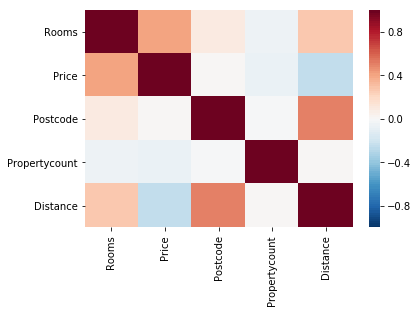

In [24]:
sns.heatmap(data.corr(), 
            vmin=-1, vmax=1, annot=False,
            cmap=sns.color_palette("RdBu_r", 100), 
            xticklabels=True, yticklabels=True);

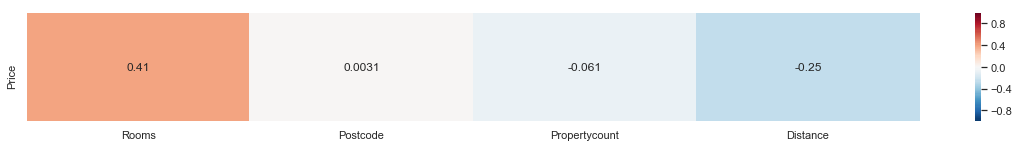

In [25]:
correlations = data.corr()

sns.set(rc={'figure.figsize':(20, 2)})

sns.heatmap(correlations[['Price']].drop('Price').T, 
            vmin=-1, vmax=1, annot = True,
            cmap=sns.color_palette("RdBu_r", 100), 
            xticklabels=True, yticklabels=True);

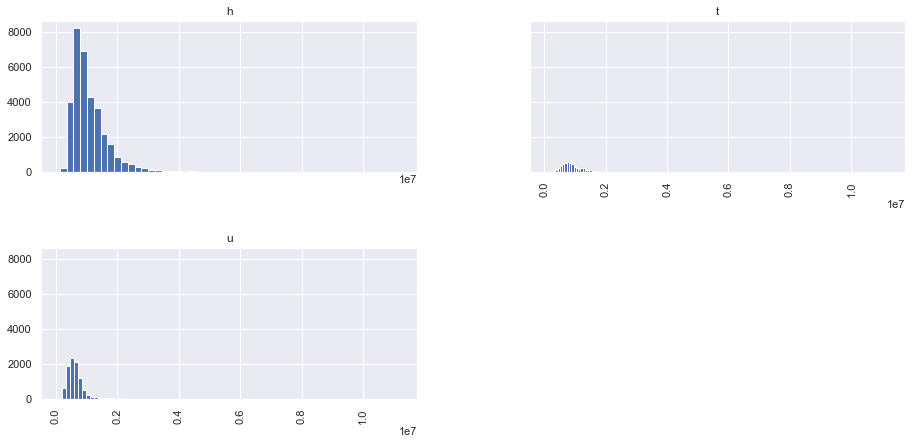

In [26]:
data.hist(column='Price', by='Type', bins = 50,sharex=True, sharey=True, layout=(2,2), figsize = (15, 7));

In [27]:
Type_dummy=pd.get_dummies(data.Type) 
Type_dummy.head(5)

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
data = pd.concat([data, Type_dummy],axis=1).copy()
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,h,t,u
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1,0,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1,0,0


In [29]:
Method_dummy=pd.get_dummies(data.Method) 
Method_dummy.head(5)

,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [30]:
data = pd.concat([data, Method_dummy],axis=1).copy()
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,...,0,0,0,1,0,0,0,0,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,...,0,0,0,1,0,0,0,0,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,...,0,0,0,1,0,0,0,0,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,...,0,0,0,1,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,...,0,0,0,1,0,0,0,0,0,0


In [31]:
Year_month = pd.concat([data.Date.dt.year, data.Date.dt.month],axis=1).copy()
Year_month.columns = ['Year','Month']

In [32]:
data_use = pd.concat([data[['Price','Rooms','Propertycount','Distance','h','t','u','Regionname','PI','PN','S','SA','SN','SP','SS','VB','W','Date']],Year_month],axis=1).copy()

In [33]:
data_use.head(5)

,Price,Rooms,Propertycount,Distance,h,t,u,Regionname,PI,PN,S,SA,SN,SP,SS,VB,W,Date,Year,Month
0,1490000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1
1,1220000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1
2,1420000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1
3,1515000.0,3,1543,7.5,1,0,0,Western Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1
4,670000.0,2,3464,10.4,1,0,0,Western Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1


In [34]:
data_use.isnull().sum()

Price            14590
Rooms                0
Propertycount        0
Distance             0
h                    0
t                    0
u                    0
Regionname           0
PI                   0
PN                   0
S                    0
SA                   0
SN                   0
SP                   0
SS                   0
VB                   0
W                    0
Date                 0
Year                 0
Month                0
dtype: int64

In [35]:
null = data_use[data_use.Price.isnull()]
null.head()

,Price,Rooms,Propertycount,Distance,h,t,u,Regionname,PI,PN,S,SA,SN,SP,SS,VB,W,Date,Year,Month
8,NaN,6,1899,14.0,1,0,0,Western Metropolitan,1,0,0,0,0,0,0,0,0,2017-01-04,2017,1
15,NaN,4,7630,15.5,1,0,0,Western Metropolitan,0,0,0,0,1,0,0,0,0,2017-01-04,2017,1
24,NaN,4,3052,10.2,1,0,0,Southern Metropolitan,0,0,1,0,0,0,0,0,0,2017-01-04,2017,1
29,NaN,4,1130,16.5,1,0,0,Northern Metropolitan,0,0,0,0,1,0,0,0,0,2017-01-04,2017,1
38,NaN,3,7809,9.7,1,0,0,Southern Metropolitan,0,0,0,0,0,1,0,0,0,2017-01-04,2017,1


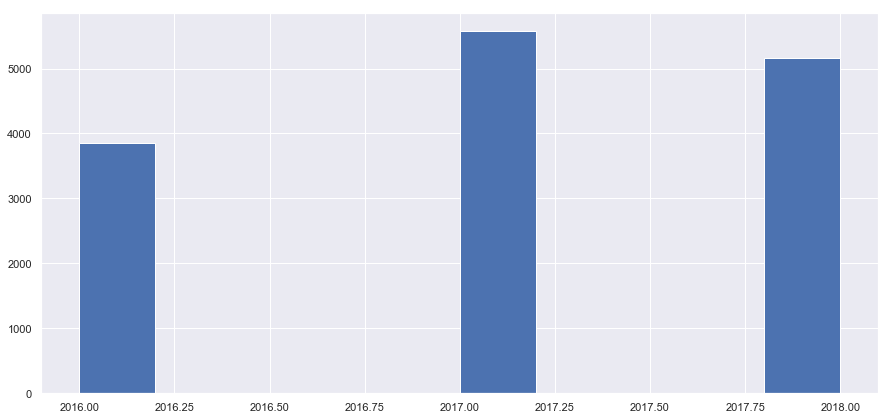

In [36]:
null.Year.hist( figsize = (15, 7))

In [37]:
not_null = data_use.dropna()
not_null.head()
not_null.shape

(48433, 20)

In [38]:
df = not_null

In [39]:

# make above code into a function input is a list of features



def r2_rmse_repeat(dataframe, feature_cols, split):
    X = dataframe[feature_cols]
    y = dataframe.Price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split , random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
   
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test) 
    #print('1', y_pred)
    print('lin reg: R2:', metrics.r2_score(y_test, y_pred),'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    y_null = y_pred
    y_null.fill(y_test.mean())
    
    #print('11',y_pred,'22',y_null,'33',y_test)
    print('Null: RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_null)))
    #print('lin reg: R2:', metrics.r2_score(y_test, y_pred),'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    ridge_alphas = np.logspace(0, 5, 200)
    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)
    
    ridge = Ridge(alpha=optimal_ridge.alpha_).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print('Ridge: R2:', metrics.r2_score(y_test,y_pred),'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
    optimal_lasso.fit(X_train, y_train)

    lasso = Lasso(alpha=optimal_lasso.alpha_).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print('Lasso: R2:', metrics.r2_score(y_test,y_pred), 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    l1_ratios = np.linspace(0.01, 1.0, 25)
    optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1).fit(X_train, y_train)

    enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_).fit(X_train, y_train)
    y_pred = enet.predict(X_test)
    print('enet: R2:', metrics.r2_score(y_test,y_pred),'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



In [40]:
#first model use ['Rooms','Distance','t','u','Year']
features = ['Rooms','Distance','t','u','Year']



In [41]:
r2_rmse_repeat(not_null,features,0.25)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


lin reg: R2: 0.3493700238294952 RMSE: 474144.7250742608
Null: RMSE: 587819.3647686519
Ridge: R2: 0.34935385220188986 RMSE: 474150.61755121435


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso: R2: 0.34937377889915266 RMSE: 474143.3568241766


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

enet: R2: 0.34937377889915266 RMSE: 474143.3568241766


.................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   10.3s finished


In [42]:
#lin reg: R2: 0.3493700238294952 RMSE: 474144.7250742608
#Null: R2: 0.0 RMSE: 587819.3647686519
#Ridge: R2: 0.34935385220188986 RMSE: 474150.61755121435
#Lasso: R2: 0.34937377889915266 RMSE: 474143.3568241766
#enet: R2: 0.34937377889915266 RMSE: 474143.3568241766

In [43]:
features = ['Rooms','Propertycount','Distance','h','t','PI','PN','S','SA','SN','SP','SS','VB']


In [44]:
r2_rmse_repeat(not_null,features,0.25)

lin reg: R2: 0.3533574869084779 RMSE: 472689.56598999153
Null: RMSE: 587819.3647686519


C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Ridge: R2: 0.3530889242586379 RMSE: 472787.71417985176


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso: R2: 0.3531309590653996 RMSE: 472772.35359646176


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

enet: R2: 0.3531309590653996 RMSE: 472772.35359646176


In [45]:
#lin reg: R2: 0.3533574869084779 RMSE: 472689.56598999153
#Null: R2: 0.0 RMSE: 587819.3647686519
#Ridge: R2: 0.3530889242586379 RMSE: 472787.71417985176
#Lasso: R2: 0.3531309590653996 RMSE: 472772.35359646176
#enet: R2: 0.3531309590653996 RMSE: 472772.35359646176

In [46]:
features = ['Rooms','Propertycount','Distance','h','t','PI','PN','S','SA','SN','SP','SS','VB','Year']
r2_rmse_repeat(not_null,features,0.25)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


lin reg: R2: 0.3540692701226076 RMSE: 472429.3409590384
Null: RMSE: 587819.3647686519
Ridge: R2: 0.3538292120111708 RMSE: 472517.12123866234


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso: R2: 0.35387162501528135 RMSE: 472501.61357424397


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

enet: R2: 0.35387162501528135 RMSE: 472501.61357424397


...................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   12.7s finished


In [47]:
#lin reg: R2: 0.3540692701226076 RMSE: 472429.3409590384
#Null: R2: 0.0 RMSE: 587819.3647686519
#Ridge: R2: 0.3538292120111708 RMSE: 472517.12123866234
#Lasso: R2: 0.35387162501528135 RMSE: 472501.61357424397
#enet: R2: 0.35387162501528135 RMSE: 472501.61357424397

In [57]:
#y_null= []

In [63]:
def log_r2_rmse_repeat(dataframe, feature_cols, split):
    X = dataframe[feature_cols]
    y = np.log(dataframe.Price)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split , random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
   
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test) 
    #print('1', y_pred)
    print('lin reg: R2:', metrics.r2_score(np.exp(y_test), np.exp(y_pred)),'RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))

    #y_null = []
    y_null = y_test.apply(lambda x: np.mean(y_train))
    #y_null.fill(y_test.mean())
    
    #print('11',y_pred,'22',y_null,'33',y_test)
    print('Null: RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    #print('lin reg: R2:', metrics.r2_score(y_test, y_pred),'RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    ridge_alphas = np.logspace(0, 5, 200)
    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)
    
    ridge = Ridge(alpha=optimal_ridge.alpha_).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print('Ridge: R2:', metrics.r2_score(np.exp(y_test), np.exp(y_pred)),'RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))

    optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
    optimal_lasso.fit(X_train, y_train)

    lasso = Lasso(alpha=optimal_lasso.alpha_).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print('Lasso: R2:', metrics.r2_score(np.exp(y_test), np.exp(y_pred)), 'RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))

    l1_ratios = np.linspace(0.01, 1.0, 25)
    optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1).fit(X_train, y_train)

    enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_).fit(X_train, y_train)
    y_pred = enet.predict(X_test)
    print('enet: R2:', metrics.r2_score(np.exp(y_test), np.exp(y_pred)),'RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))

In [64]:
features = ['Rooms','Distance','t','u','Year']
log_r2_rmse_repeat(not_null,features,0.25)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


lin reg: R2: 0.352912042844606 RMSE: 472852.3456623642
Null: RMSE: 472852.3456623642
Ridge: R2: 0.3525618561885042 RMSE: 472980.2758635305


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso: R2: 0.3526347977742461 RMSE: 472953.6316941707


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

enet: R2: 0.3525470010693723 RMSE: 472985.7019711129


..........................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   12.8s finished


In [65]:
#lin reg: R2: 0.4351948169385178 RMSE: 0.3719061463389883
#Null: RMSE: 0.4948619009537657
#Ridge: R2: 0.4351846568494607 RMSE: 0.3719094913707693
#Lasso: R2: 0.4351971606930829 RMSE: 0.37190537469448265
#enet: R2: 0.43519432708216255 RMSE: 0.37190630761632365

In [66]:
features = ['Rooms','Propertycount','Distance','h','t','PI','PN','S','SA','SN','SP','SS','VB','Year']
log_r2_rmse_repeat(not_null,features,0.25)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


lin reg: R2: 0.3593825653753909 RMSE: 470482.27464941354
Null: RMSE: 470482.27464941354
Ridge: R2: 0.3590119846166724 RMSE: 470618.33594097197


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso: R2: 0.3589643188030893 RMSE: 470635.83391933615


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

enet: R2: 0.3589426792792727 RMSE: 470643.77750944253


...................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   15.3s finished


In [67]:
#lin reg: R2: 0.44233469143384907 RMSE: 0.3695479805791
#Null: RMSE: 0.4948619009537657
#Ridge: R2: 0.4421140375781619 RMSE: 0.369621083676138
#Lasso: R2: 0.4420911490228231 RMSE: 0.369628665876109
#enet: R2: 0.44208938774459294 RMSE: 0.369629249321243 
            
            

In [ ]:
features = ['Rooms','Propertycount','Distance','h','t','PI','PN','S','SA','SN','SP','SS','VB','Year']

X = not_null[features]
y = not_null.Price


train_rmse = []
val_rmse = []

degrees = range(1,5)

for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    print("Polynomial features:", X_poly.shape)

    # Create train-validation-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, shuffle=True, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=42)
    print("Train-validation-test split:", X_train.shape, X_val.shape, X_test.shape)

    # Standardise the data
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, y_train)

    y_pred = lin_reg.predict(X_val_scaled)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train_scaled))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))

In [ ]:
column_dict = {'d': degrees, 
               'Training RMSE' : train_rmse, 
               'Validation RMSE' : val_rmse}

rmse = pd.DataFrame(column_dict).set_index('d').sort_index(ascending=False)
rmse.plot(figsize = (7, 7));

In [ ]:
rmse.sort_values(by='Validation RMSE')

In [ ]:
# Polynomial features
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, shuffle=True, random_state=42)

# Standardise the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)
    
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
X = not_null[features]
y = not_null.Price


degrees = range(1,4)

for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, shuffle=True, random_state=42)

    # Create a pipeline to first standardise the data 
    # and then fit a linear regression model
    pipeline = Pipeline([
        ("scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
    
    # 5-fold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

    print("Polynomial regression with degree {}. Mean RMSE for all folds is {}".format(degree,
                                                                                       np.mean(np.sqrt(-scores))))

In [ ]:
## clasicfication model to see if we can differencatate between house and unit/townhouse


In [68]:
not_null['H_or_U'] = 'House'
not_null.loc[not_null.h == 0,'H_or_U' ] = 'Unit'

not_null.head()

C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yoshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Price,Rooms,Propertycount,Distance,h,t,u,Regionname,PI,PN,...,SA,SN,SP,SS,VB,W,Date,Year,Month,H_or_U
0,1490000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,...,0,0,0,0,0,0,2017-01-04,2017,1,House
1,1220000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,...,0,0,0,0,0,0,2017-01-04,2017,1,House
2,1420000.0,3,4019,3.0,1,0,0,Northern Metropolitan,0,0,...,0,0,0,0,0,0,2017-01-04,2017,1,House
3,1515000.0,3,1543,7.5,1,0,0,Western Metropolitan,0,0,...,0,0,0,0,0,0,2017-01-04,2017,1,House
4,670000.0,2,3464,10.4,1,0,0,Western Metropolitan,0,0,...,0,0,0,0,0,0,2017-01-04,2017,1,House


In [69]:

features = ['Rooms','Propertycount','Distance','Year']

X = not_null[features]
y = not_null['H_or_U']

print(X.shape, y.shape)

(48433, 4) (48433,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1)
print(X_train.shape, X_test.shape)

(36324, 4) (12109, 4)


In [71]:
most_freq_class = y_train.value_counts().index[0]
print("Most frequent class:", most_freq_class)

n_most_freq = y_test.value_counts()[most_freq_class]
print("Null accuraccy:", n_most_freq / len(y_test))

Most frequent class: House
Null accuraccy: 0.7014617226856057


In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

print(log_reg.intercept_)
print(log_reg.coef_)

[-1.26863004]
[[-1.53297663  0.03490231 -0.23771871  0.02122786]]


In [74]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = log_reg.predict(X_test_scaled)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing F score:", f1_score(y_test, y_pred, pos_label='House'))

Testing Accuracy: 0.8045255595011974
Testing F score: 0.8647505856808183


In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[7567,  927],
       [1440, 2175]], dtype=int64)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [77]:
y_pred = knn.predict(X_test_scaled)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing F score:", f1_score(y_test, y_pred, pos_label='House'))

Testing Accuracy: 0.8014699810058634
Testing F score: 0.8648679033164699


In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=1)
print("Train-validation-test split:", X_train.shape, X_val.shape, X_test.shape)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Train-validation-test split: (27243, 4) (9081, 4) (12109, 4)


C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [79]:
def choose_k():
    # Define maximum number of neighbours
    k_max = min(101, y_train.shape[0])
    k_range = list(range(1, k_max))
    
    train_error = []
    val_error = []

    # Find training and test accuracy for all values of k between 1 and 100 (inclusive).
    for k in k_range:

        # Instantiate the model with the current K value.
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        # Calculate training error (error = 1 - accuracy).
        y_pred_class = knn.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_pred_class)
        train_error.append(1 - train_accuracy)

        # Calculate testing error.
        y_pred_class = knn.predict(X_val_scaled)
        val_accuracy = accuracy_score(y_val, y_pred_class)
        val_error.append(1 - val_accuracy)
            
    return k_range, train_error, val_error

In [80]:
k_range, train_error, val_error = choose_k()
column_dict = {'k': k_range, 
               'Training error' : train_error, 
               'Validation error' : val_error}

errors = pd.DataFrame(column_dict).set_index('k').sort_values('Validation error')
errors.head()

,Training error,Validation error
k,,
47,0.189443,0.187645
45,0.189113,0.187975
43,0.188746,0.188195
50,0.190398,0.188305
68,0.190324,0.188746


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing F score:", f1_score(y_test, y_pred, pos_label='House'))

print("\nClasses:", knn.classes_)

confusion_matrix(y_test, y_pred)

C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yoshi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Testing Accuracy: 0.7999834833594847
Testing F score: 0.8656981257624488

Classes: ['House' 'Unit']


array([[7806,  688],
       [1734, 1881]], dtype=int64)

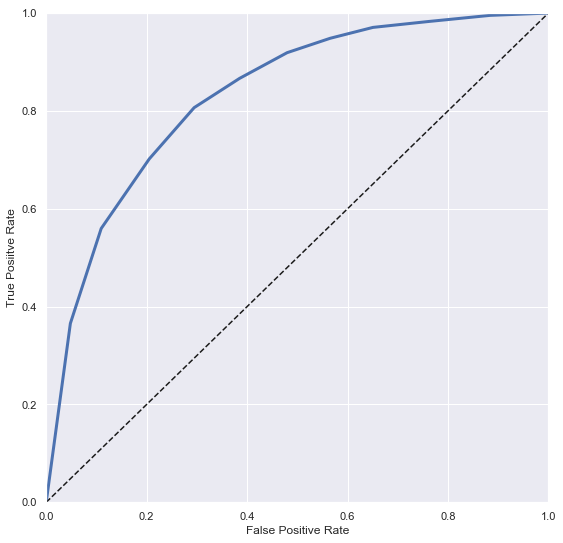

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = knn.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(y_test, y_proba[:,0], pos_label='House')

plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Posiitve Rate');


In [ ]:


#random forest can try as well